### Bank Churn Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()

#Plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib

In [2]:
#Import the dataset
bank = pd.read_csv("https://raw.githubusercontent.com/adrian459/pembelajaran-python-AI/main/bank_churn.csv")

In [3]:
bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
#Data Cleaning
#RowNumber, Surname, Customer ID will be dropped.Because it is not needed in the data analysis
#Has Card,isActiveMember, and Exited will be changed to true and false because is cathegorical elements
bank.drop('RowNumber', axis = 1, inplace = True)
bank.drop('CustomerId', axis = 1, inplace = True)
bank.drop('Surname', axis = 1, inplace = True)

In [5]:
bank

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [6]:
bank.info()
#RowNumber, Surname, Customer ID will be deleted
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
bank.describe().transpose()

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

France :  50.13999999999999 %


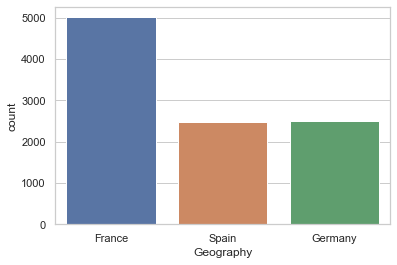

In [8]:
sns.countplot(x=bank['Geography'])
bank['Geography'].value_counts()
#France is most dominant country,almost 50% customer are french people
print("France : ", 5014/(2509+2477+5014)*100, "%")

Male :  54.56999999999999 %


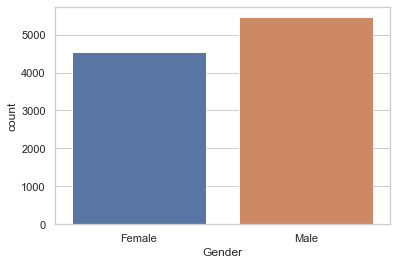

In [9]:
sns.countplot(x = bank['Gender'])
bank['Gender'].value_counts()
#Almost 54.6% are male customer, 45.4% are female
print("Male : ", 5457/(5457+4543)*100, "%")

1    5151
0    4849
Name: IsActiveMember, dtype: int64

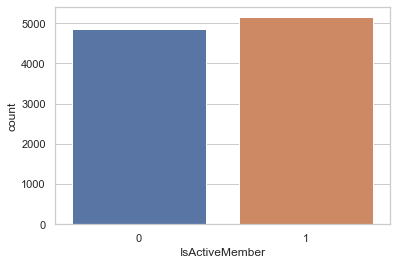

In [10]:
sns.countplot(x = bank['IsActiveMember'])
bank['IsActiveMember'].value_counts()
#almost 50% customer is inactive

1    7055
0    2945
Name: HasCrCard, dtype: int64

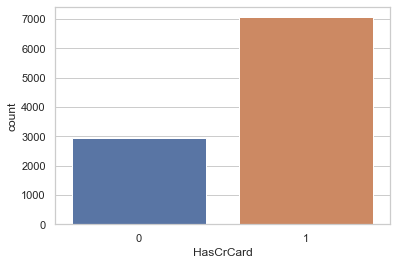

In [11]:
sns.countplot(x = bank['HasCrCard'])
bank['HasCrCard'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

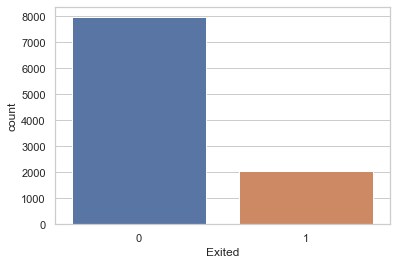

In [12]:
sns.countplot(x = bank['Exited'])
bank['Exited'].value_counts()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


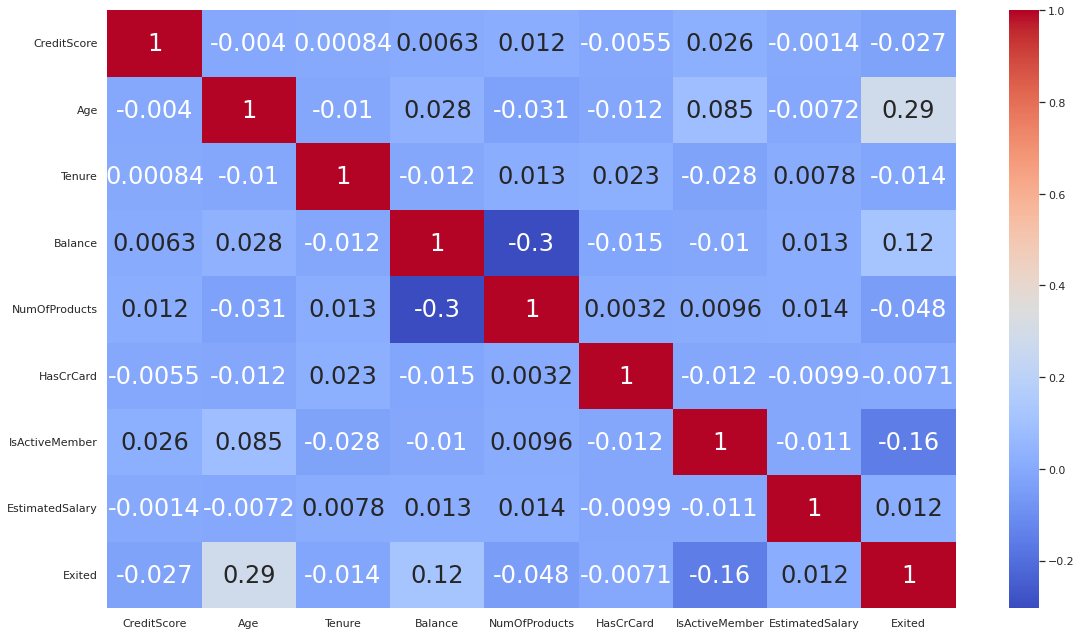

In [13]:
font = {'size':24, 'family':'normal'}
matplotlib.rc('font', **font)
plt.figure(figsize=(19,11))
sns.heatmap(bank.corr(), annot=True, cmap='coolwarm')
#Balance have negative correlation with numOfProduct with a small amount -0.3, but numOfProduct
#has no correlation with Exited.
#Balance, Age, and isActiveMember have weak corellation with Exited
#the average balance of customer is 76485.889288$ 
#the average age of customer is 39

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


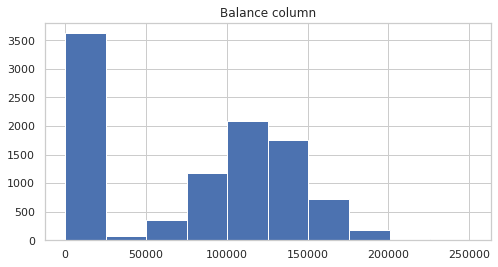

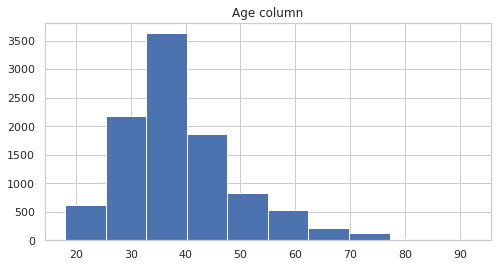

In [14]:
#now I want to find out if the balance, age,  can affect the customer to leave ?
numeric_col = ['Balance', 'Age']
for column in numeric_col:
  plt.figure(figsize=(8,4))
  plt.title(f"{column} column")
  plt.hist(bank[column])
  plt.show()

In [15]:
from scipy import stats
#Kolmogorov Smirnov Test
#Ho = normally distributed balance
#Ha = opposite Ho
#α = 5%
z_score_Age = stats.zscore(bank['Age'])
z_score_Balance = stats.zscore(bank['Balance'])
print('P-value Age = ', stats.kstest(z_score_Age, "norm"))
print('P-value Balance = ', stats.kstest(z_score_Balance, "norm"))
print("P-value Age > α , accept H0 data are normally distributed")
print("P-value Balance <= α , reject H0 data are not normally distributed")

P-value Age =  KstestResult(statistic=0.10095678840195232, pvalue=3.492314209372659e-89)
P-value Balance =  KstestResult(statistic=0.2515719980592674, pvalue=0.0)
P-value Age > α , accept H0 data are normally distributed
P-value Balance <= α , reject H0 data are not normally distributed


In [16]:
#Parametric for Age and Exited
#T-test
t_value = stats.ttest_ind(bank['Age'], bank['Exited'])
print('result t: ', t_value)
print("Age not affecting customer bank to leave, no correlation between age and Exited customer")

result t:  Ttest_indResult(statistic=368.90059346979893, pvalue=0.0)
Age not affecting customer bank to leave, no correlation between age and Exited customer


<Figure size 720x432 with 0 Axes>

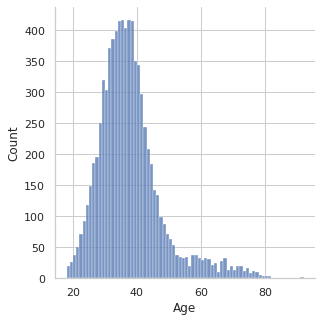

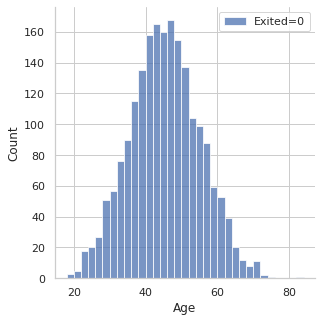

In [58]:
#Bivariate Analysis Numeric and Cathergorcal Data between age and exited customer
plt.figure(figsize=(10,6))
sns.displot(bank['Age'][bank['Exited']==0])
sns.displot(bank['Age'][bank['Exited']==1])
plt.legend(['Exited=0', 'Exited=1'])
plt.show()

In [43]:
pivot = pd.crosstab(bank['Age'], bank['Exited'], margins=True)
pivot[12:25]

Exited    0   1  All
Age                 
30      303  24  327
31      371  33  404
32      386  32  418
33      398  44  442
34      414  33  447
35      417  57  474
36      403  53  456
37      416  62  478
38      414  63  477
39      351  72  423
40      343  89  432
41      297  69  366
42      244  77  321

In [55]:
pivot[12:25][1].max()

89

In [ ]:
#most bank customers leave the bank aged 30 to 42, and the highest at age 40 as much 89 people